# Let's try to get Gang's plots reproduced

In [19]:
import matplotlib.pyplot as plt
import uproot
import csv
import numpy as np

In [22]:
def get_data(filename, importantColumn=1, delr = ' '):
    output = []
    with open(filename) as file:
        line_reader = []
        if delr=='':
            line_reader = csv.reader(file)
        else:
            line_reader = csv.reader(file, delimiter=delr)
        for row in line_reader:
            output.append(float(row[importantColumn]))
    return np.array(output)

def  get_epsilon(sigIn, path_to_eff):
    # I'm not entirely sure what cut efficiency He pulls, so I'll just do the ratio of the first to the last for now
    efficiencies = get_data(path_to_eff, importantColumn=0, delr='')
    # print(efficiencies)
    return sigIn*(efficiencies[-1]/efficiencies[0])*(10**3)*35.9

In [30]:
path_to_Gang = '/Users/dysonk/Work/Gang_analysis/'
gang_diboson_path = 'prompt_NR_highSR1/'

WZ_Gang_raw_mllWj_file_name = path_to_Gang+gang_diboson_path+'Mll_jjWZ.dat'
WZ_MllWj_raw_Masses = get_data(WZ_Gang_raw_mllWj_file_name)
sig_WZ = 24.61
eps_WZ = get_epsilon(sig_WZ, path_to_Gang+gang_diboson_path+'cut_eff_jjWZ.dat')
ZZ_Gang_raw_mllWj_file_name = path_to_Gang+gang_diboson_path+'Mll_jjZZ.dat'
ZZ_MllWj_raw_Masses = get_data(ZZ_Gang_raw_mllWj_file_name)
sig_ZZ = 35.19 # check if these match with what I had found
eps_ZZ = get_epsilon(sig_ZZ, path_to_Gang+gang_diboson_path+'cut_eff_jjZZ.dat')


CMS_mllWj1_file_name = path_to_Gang+gang_diboson_path+'mllW_1.dat'
CMS_mllWj3_file_name = path_to_Gang+gang_diboson_path+'mllW_3.dat'
CMS_to_plot = get_data(CMS_mllWj3_file_name) - get_data(CMS_mllWj1_file_name)

# print(WZ_MllWj_raw_Masses)
# with open(WZ_Gang_raw_mllWj_file_name) as File:
#     Line_reader = csv.reader(File, delimiter=' ')
#     for row in Line_reader:
#         WZ_MllWj_raw_Masses.append(float(row[1]))



[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
 145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245. 255. 265. 275.
 285. 295.]
[ 0.          9.67398101 34.48296516 55.85705301 65.09851581 67.60670727
 76.35401146 55.96821281 36.23725199 37.2255412  33.61790072 28.97239562
 24.26530613 23.83275991 18.14941819 22.57263169 16.72861076  9.402142
  7.16576155  6.78276274 14.70245692  5.02848991  4.6454939   3.33580987
  5.41148312  5.41148312  1.03783662  1.80382864  4.48479789  0.        ]


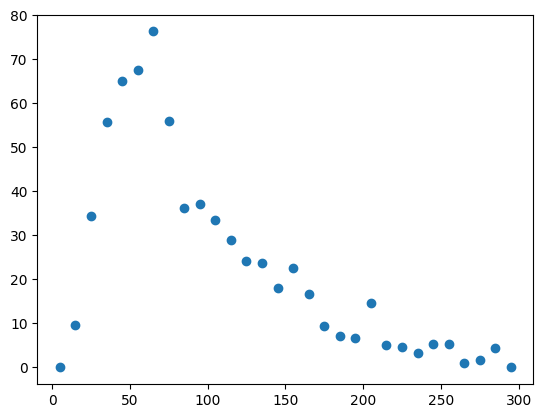

In [29]:
Mass_range = get_data(WZ_Gang_raw_mllWj_file_name, importantColumn=0)
MllWjj_to_plot = 1.3 * (eps_WZ*WZ_MllWj_raw_Masses+eps_ZZ*ZZ_MllWj_raw_Masses)
print(Mass_range)
print(MllWjj_to_plot)
plt.scatter(Mass_range, MllWjj_to_plot)

[ 17.5  90.5 142.  145.5 120.5 101.   66.5  51.   40.5  21.   18.   13.5
  10.    6.    6. ]


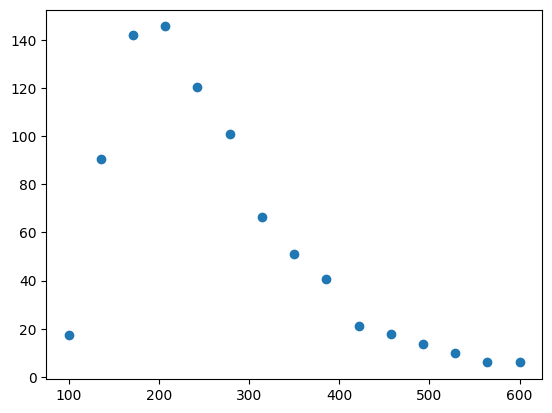

In [34]:
print(CMS_to_plot)
plt.scatter(np.linspace(100, 600, 15), CMS_to_plot)